<a href="https://colab.research.google.com/github/DuyHung-1254/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT thư viện cần thiết 

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.datasets.mnist import load_data
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input ,Reshape
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten, Input ,Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical



In [35]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Chia tập Train và Test

In [ ]:
(x_train , y_train) , (x_test , y_test ) = load_data()
print(x_train.shape)

(60000, 28, 28)


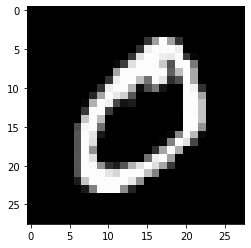

In [ ]:
plt.imshow(x_train[1] , cmap = 'gray')

# Chuẩn hóa về dạng 0 - 1 

In [ ]:
x_train_scaled = np.array(x_train)/255
x_test_scaled = np.array(x_test)/255

# Onehot coding

In [ ]:
# onthotcoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Khởi tạo model

In [ ]:
from tensorflow.keras.layers import Input , Dense 
from tensorflow.keras.models import Model
# cnn
inp = Input(shape = (28,28,1))

cnn = Conv2D(filters = 5 , kernel_size = 4, activation = 'relu')(inp)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 5 , kernel_size = 4 , activation = 'relu')(drop)
pooling = MaxPooling2D(pool_size = (2,2))(cnn)

drop = Dropout(0.2)(pooling) # giảm ovrerfitting

#cnn = Conv2D(filters = 16 , kernel_size = 3 , activation = 'relu')(drop)
#pooling = MaxPooling2D(pool_size = (2,2))(cnn)

# sử lý ảnh xong mới duỗi 
f = Flatten()(drop)
fc1 = Dense(units = 20 , activation = 'relu')(f)
fc2 = Dense(units = 20 , activation = 'relu')(fc1)
out = Dense(units = 10 , activation = 'softmax')(fc2)

model = Model(inputs = inp , outputs = out)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 5)         85        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 5)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 5)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 5)           405       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 5)          0         
 2D)                                                       

# training

In [ ]:
#optimizerl = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001 , bate_1 = 0.99, beta_2 = 0.999, epsilon = 1e - 07)

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics = ['accuracy'])
# validation_data : kiểu cho tập train và tập test vào model đánh giá lại model lần nữa 
history = model.fit(x_train_scaled , y_train , batch_size =512 , epochs = 51 , validation_data = (x_test_scaled , y_test))

Epoch 1/51
118/118 [==============================] - 21s 169ms/step - loss: 0.1470 - accuracy: 0.9532 - val_loss: 0.0598 - val_accuracy: 0.9810
Epoch 2/51
118/118 [==============================] - 18s 155ms/step - loss: 0.1477 - accuracy: 0.9531 - val_loss: 0.0615 - val_accuracy: 0.9815
Epoch 3/51
118/118 [==============================] - 19s 165ms/step - loss: 0.1458 - accuracy: 0.9535 - val_loss: 0.0637 - val_accuracy: 0.9798
Epoch 4/51
118/118 [==============================] - 18s 154ms/step - loss: 0.1423 - accuracy: 0.9551 - val_loss: 0.0589 - val_accuracy: 0.9826
Epoch 5/51
118/118 [==============================] - 20s 166ms/step - loss: 0.1419 - accuracy: 0.9556 - val_loss: 0.0598 - val_accuracy: 0.9808
Epoch 6/51
118/118 [==============================] - 18s 155ms/step - loss: 0.1422 - accuracy: 0.9541 - val_loss: 0.0577 - val_accuracy: 0.9822
Epoch 7/51
118/118 [==============================] - 19s 160ms/step - loss: 0.1418 - accuracy: 0.9549 - val_loss: 0.0583 - val_ac

# chart accuracy

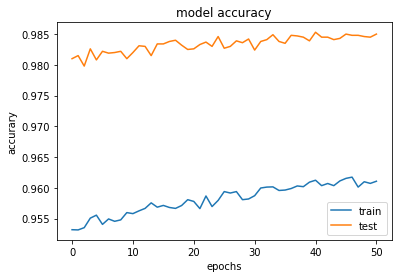

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accurary")
plt.xlabel('epochs')
plt.legend(["train" , "test"] )

# chart loss

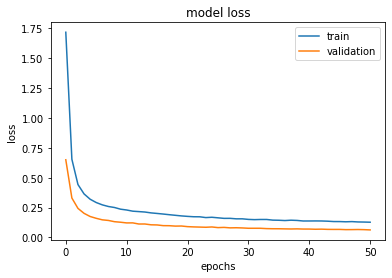

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend(["train" , "validation"] )

# test thêm số tự viết 

In [36]:
# lưu model trên kia lại , như một pre-model
model.save('/content/drive/MyDrive/Colab_Notebooks/ML_official /data/pre_model/mnist.h5')

In [37]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab_Notebooks/ML_official /data/pre_model/mnist.h5')

(648, 1152, 3)


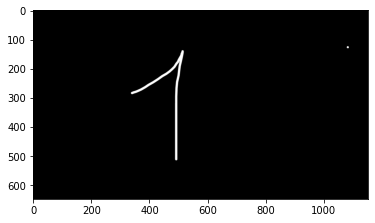

In [38]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/ML_official /data/pre_model/anh_so_1.png')
print(img.shape)\

# có 3 kênh màu , 3 lớp BRG 
plt.imshow(img)


# crop ảnh

(600, 600, 3)


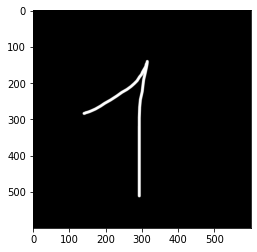

In [39]:

import numpy as np
import cv2
y=0
x=200
h=600
w = 600
crop = img[y:y+h, x:x+w]
plt.imshow (crop)
cv2.waitKey(0) 

print(crop.shape)

# resize

(28, 28)


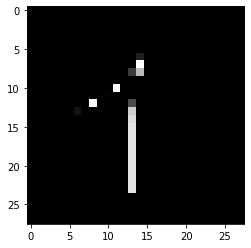

In [40]:
new_img = cv2.resize((crop),dsize = (28,28))
# chỉ còn 1 kênh màu thôi - từ bgr -> gray
new_img = cv2.cvtColor(new_img , cv2.COLOR_BGR2GRAY)
plt.imshow(new_img , cmap = 'gray')

print(new_img.shape)



# Chuẩn hóa về 0 1

In [41]:
a = np.array([new_img /255.])
print(a.shape)

(1, 28, 28)


1/1 [==============================] - 0s 22ms/step
Dự đoán  1


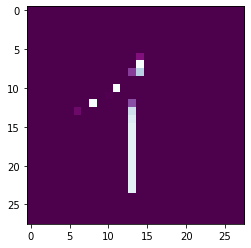

In [45]:
y_pred = model.predict(a)
print("Dự đoán " , np.argmax(y_pred))
plt.imshow(new_img , cmap = 'BuPu_r')